**Data collection and exploration in the real world: You have to collect data (at least 50 samples, more the better) via any experiment of your choice. You must ensure data quality. CLearly define relevant attributes. Perform data exploration, study the distributions and if possible, try some mathematical models to explain the data and get insights**

This project aims to analyze the survey responses collected from students of the IIT Bhilai gym.
The dataset contains detailed information on gym usage patterns, user feedback,
and suggestions for improvements. The key objectives of this analysis are:

1. To understand the demographics of gym users (e.g., age, gender, and user roles such as students or staff).
2. To analyze the frequency and duration of gym usage.
3. To gather insights into user satisfaction levels and identify areas for enhancement.
4. To present the findings through clear and informative visualizations, enabling stakeholders to make data-driven decisions
   regarding gym operations and facilities.

The analysis involves:
- Data loading and preprocessing to handle missing or inconsistent values.
- Statistical and graphical exploration of responses to understand user behavior and preferences.
- Visualization of the data using libraries like Matplotlib and Seaborn to draw actionable insights.

This report concludes with observations and potential recommendations based on the analysis, aiming to improve gym facilities
and services at IIT Bhilai.

       How satisfied are you with the gym’s equipment?\n(1 = Very Unsatisfied, 5 = Very Satisfied)  \
count                                          87.000000                                             
mean                                            3.344828                                             
std                                             0.962405                                             
min                                             1.000000                                             
25%                                             3.000000                                             
50%                                             3.000000                                             
75%                                             4.000000                                             
max                                             5.000000                                             

       How satisfied are you with the cleanliness of the gym?  \
count           

<ipython-input-2-03571f8705ad>:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=gender_counts.index, y=gender_counts.values, palette="Dark2")


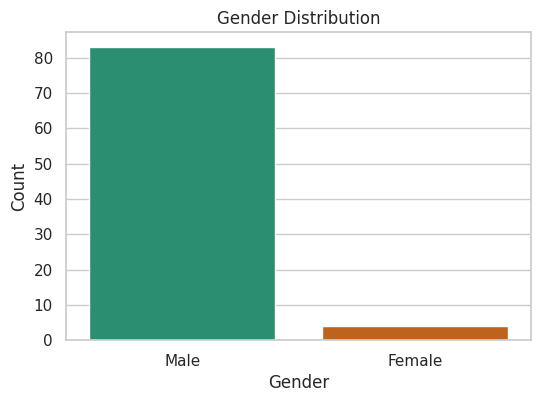

<ipython-input-2-03571f8705ad>:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=year_counts.index, y=year_counts.values, palette="magma")


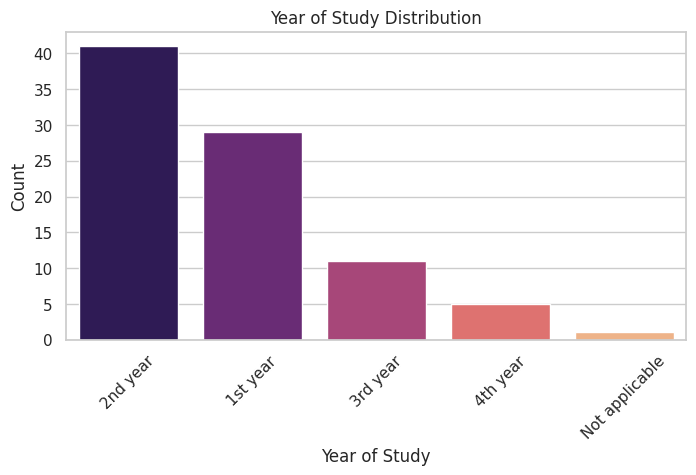

<ipython-input-2-03571f8705ad>:58: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=frequency_counts.index, y=frequency_counts.values, palette="coolwarm")


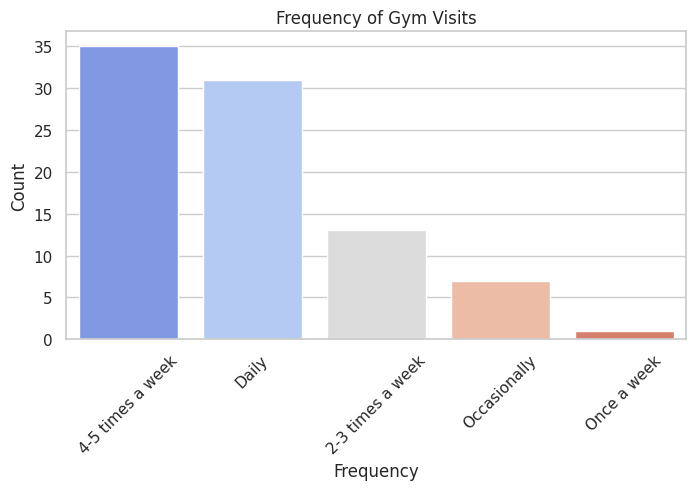

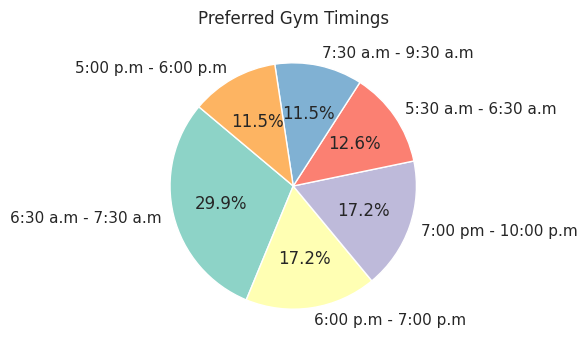

<ipython-input-2-03571f8705ad>:80: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=reasons_counts.values, y=reasons_counts.index, palette="viridis")


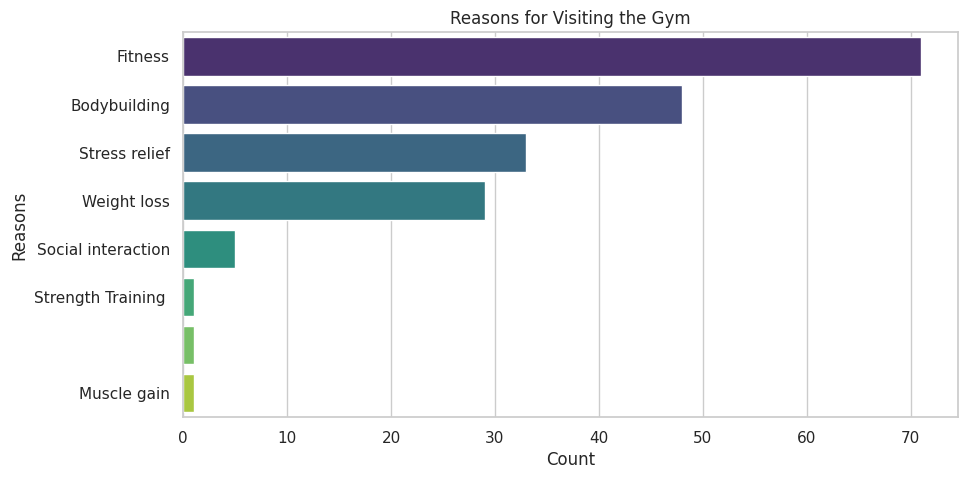

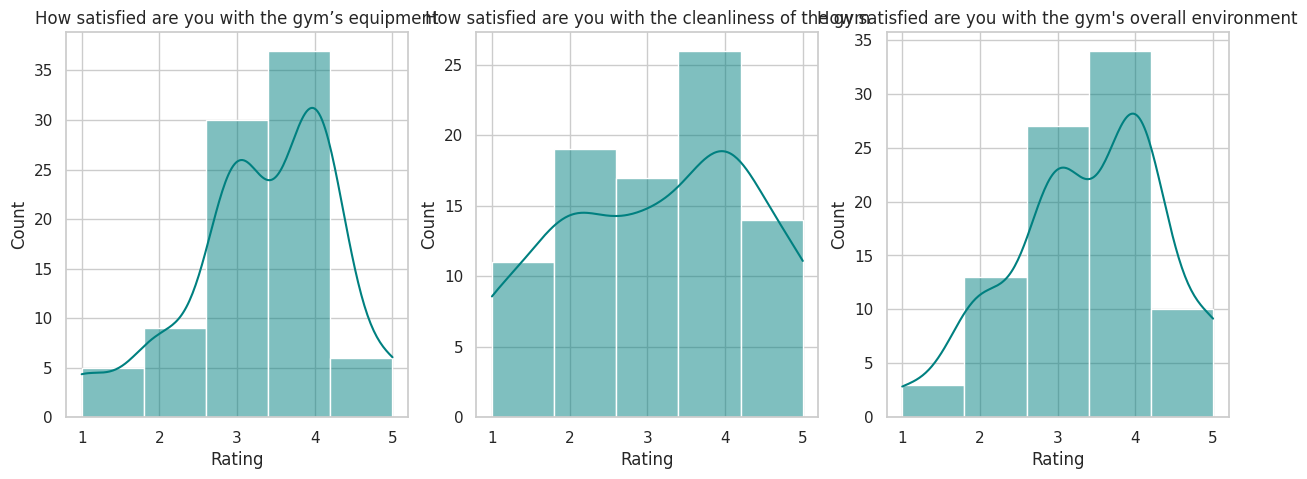

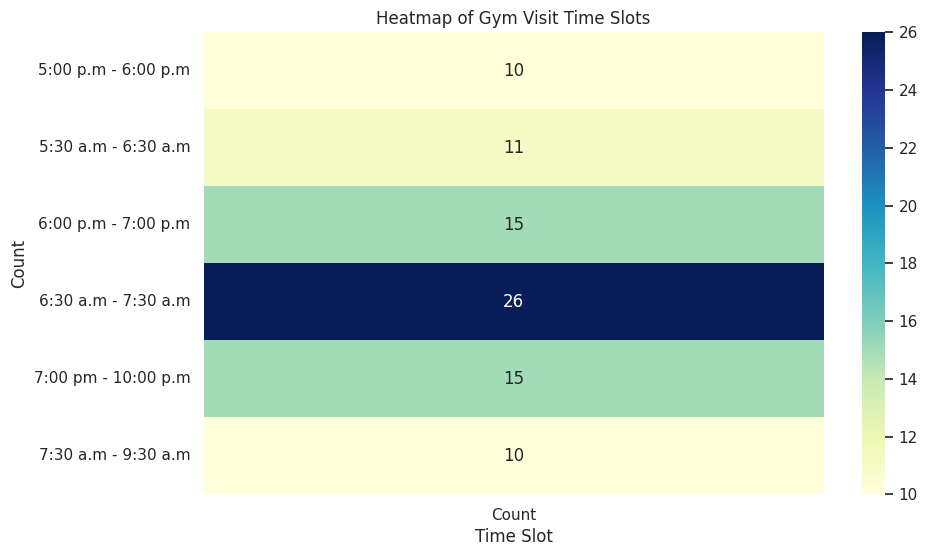

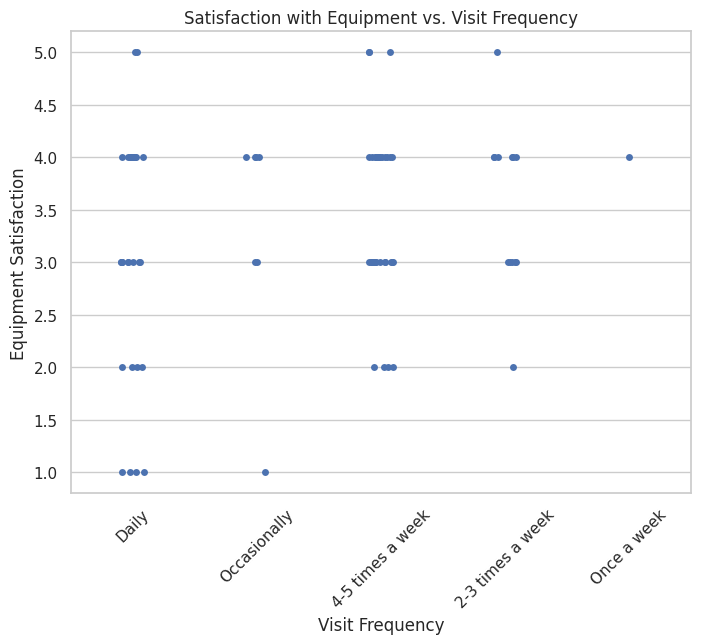

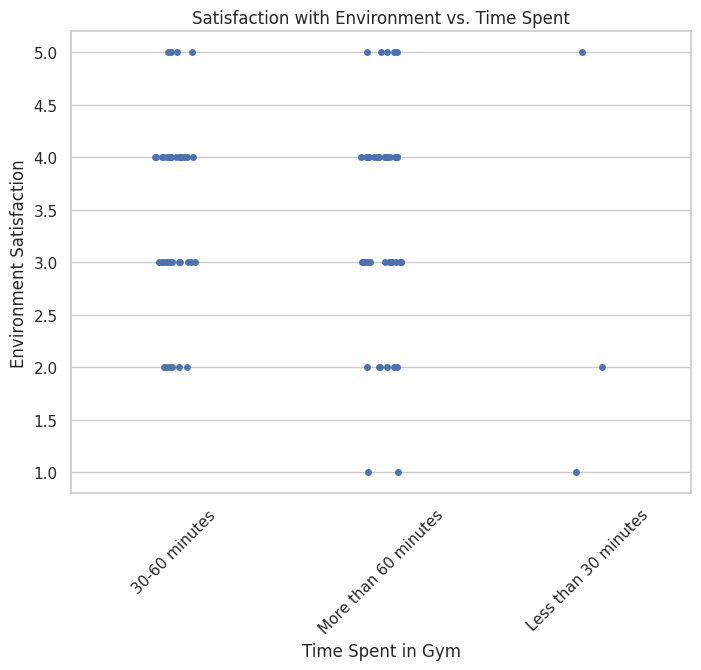

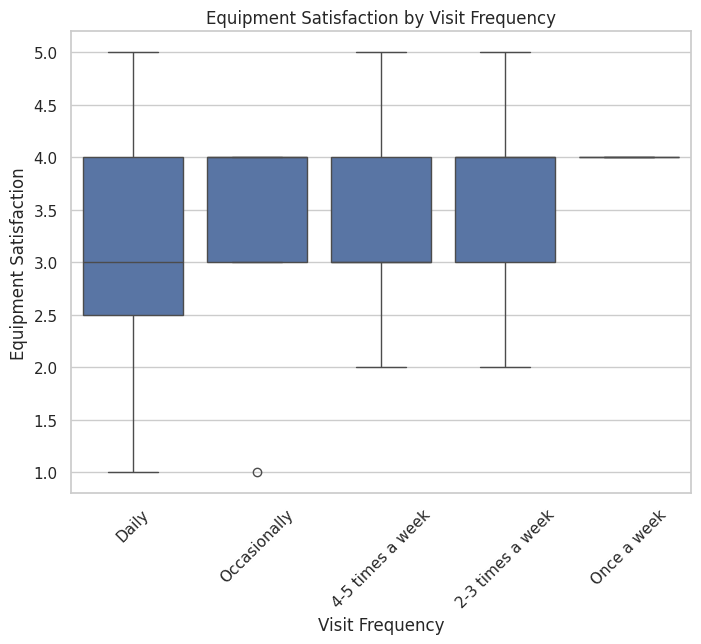

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data=pd.read_csv('https://raw.githubusercontent.com/Rahul5977/csvFiles/refs/heads/main/IIT%20Bhilai%20Gym%20Usage%20and%20Feedback%20Survey%20(Responses)%20-%20Form%20Responses%201.csv')

data = data.drop(columns=["Timestamp"])

# Filter out rows where "Do you visit the gym?" is "No"
filtered_data = data[data["Do you visit the gym?"] == "Yes"]

# Drop the "Do you visit the gym?" column since it now contains only "Yes"
filtered_data = filtered_data.drop(columns=["Do you visit the gym?"])
filtered_data=filtered_data.drop(columns=["Why don’t you visit the gym?"])
filtered_data=filtered_data.drop(columns=["Would you consider using the gym in the future?"])


# print(filtered_data.head())

# Summary statistics for numerical columns (satisfaction ratings)
numerical_summary = filtered_data.describe()

# Frequency counts for categorical columns
gender_counts = filtered_data["Gender"].value_counts()
year_counts = filtered_data["Year of Study"].value_counts()
academic_programm=filtered_data["Academic Program"].value_counts()
frequency_counts = filtered_data["How often do you visit the gym?"].value_counts()
time_counts = filtered_data["At what time do you usually visit the gym?"].value_counts()
duration_counts=filtered_data["How long do you typically spend in the gym per visit?"].value_counts()
reason=filtered_data["Why do you use the gym?"].value_counts()

# Display summaries
print(numerical_summary, gender_counts,academic_programm ,year_counts, frequency_counts, time_counts,duration_counts,reason)

# Set up visualization style
sns.set(style="whitegrid")

# Bar chart: Gender distribution
plt.figure(figsize=(6, 4))
sns.barplot(x=gender_counts.index, y=gender_counts.values, palette="Dark2")
plt.title("Gender Distribution")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

# Bar chart: Year of Study distribution
plt.figure(figsize=(8, 4))
sns.barplot(x=year_counts.index, y=year_counts.values, palette="magma")
plt.title("Year of Study Distribution")
plt.xlabel("Year of Study")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

# Bar chart: Frequency of gym visits
plt.figure(figsize=(8, 4))
sns.barplot(x=frequency_counts.index, y=frequency_counts.values, palette="coolwarm")
plt.title("Frequency of Gym Visits")
plt.xlabel("Frequency")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

# Pie chart: Preferred gym timings
plt.figure(figsize=(8, 4))
plt.pie(time_counts.values, labels=time_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("Set3", len(time_counts)))
plt.title("Preferred Gym Timings")
plt.show()

# Extract the column for the checkbox question
checkbox_column = "Why do you use the gym?"

# Split the responses into multiple entries and count occurrences of each reason
checkbox_responses = filtered_data[checkbox_column].dropna().str.split(", ")  # Split by commas
reasons_counts = pd.Series([reason for sublist in checkbox_responses for reason in sublist]).value_counts()

# Plot the horizontal bar graph
plt.figure(figsize=(10, 5))
sns.barplot(x=reasons_counts.values, y=reasons_counts.index, palette="viridis")
plt.title("Reasons for Visiting the Gym")
plt.xlabel("Count")
plt.ylabel("Reasons")
plt.show()


# Histograms: Satisfaction ratings
satisfaction_columns = [
    "How satisfied are you with the gym’s equipment?\n(1 = Very Unsatisfied, 5 = Very Satisfied)",
    "How satisfied are you with the cleanliness of the gym?",
    "How satisfied are you with the gym's overall environment?"
]

plt.figure(figsize=(15, 5))
for i, col in enumerate(satisfaction_columns, 1):
    plt.subplot(1, 3, i)
    sns.histplot(filtered_data[col], bins=5, kde=True, color="teal")
    plt.title(col.split('?')[0])  # Shorten titles
    plt.xlabel("Rating")
    plt.ylabel("Count")

time_slot_counts = filtered_data["At what time do you usually visit the gym?"].value_counts().reset_index()
time_slot_counts.columns = ["Time Slot", "Count"]
time_slot_counts = time_slot_counts.pivot_table(values="Count", index="Time Slot", aggfunc="sum")

plt.figure(figsize=(10, 6))
sns.heatmap(time_slot_counts, annot=True, fmt="d", cmap="YlGnBu")
plt.title("Heatmap of Gym Visit Time Slots")
plt.xlabel("Time Slot")
plt.ylabel("Count")
plt.show()

# Scatter Plot: Equipment Satisfaction vs. Visit Frequency
plt.figure(figsize=(8, 6))
sns.stripplot(x=filtered_data['How often do you visit the gym?'], y=filtered_data['How satisfied are you with the gym’s equipment?\n(1 = Very Unsatisfied, 5 = Very Satisfied)'], jitter=True)
plt.title("Satisfaction with Equipment vs. Visit Frequency")
plt.xlabel("Visit Frequency")
plt.ylabel("Equipment Satisfaction")
plt.xticks(rotation=45)
plt.show()

# Scatter Plot: Environment Satisfaction vs. Time Spent
plt.figure(figsize=(8, 6))
sns.stripplot(x=filtered_data['How long do you typically spend in the gym per visit?'], y=filtered_data['How satisfied are you with the gym\'s overall environment?'], jitter=True)
plt.title("Satisfaction with Environment vs. Time Spent")
plt.xlabel("Time Spent in Gym")
plt.ylabel("Environment Satisfaction")
plt.xticks(rotation=45)
plt.show()

# Box Plot: Equipment Satisfaction grouped by Visit Frequency
plt.figure(figsize=(8, 6))
sns.boxplot(x=filtered_data['How often do you visit the gym?'], y=filtered_data['How satisfied are you with the gym’s equipment?\n(1 = Very Unsatisfied, 5 = Very Satisfied)'])
plt.title("Equipment Satisfaction by Visit Frequency")
plt.xlabel("Visit Frequency")
plt.ylabel("Equipment Satisfaction")
plt.xticks(rotation=45)
plt.show()

Observation:
1.

In [ ]:
filtered_data_2 = data[data["Do you visit the gym?"] == "No"]
filtered_data_2.drop(columns=["Do you visit the gym?"])
columns_to_keep=["Why don’t you visit the gym?",
                 "Would you consider using the gym in the future?"
                 ]
filtered_data_2=filtered_data_2[columns_to_keep]
# print(filtered_data_2)

checkbox_column = "Why don’t you visit the gym?"

# Split responses into multiple entries and count occurrences
checkbox_responses = filtered_data_2[checkbox_column].dropna().str.split(", ")  # Split by commas
print(checkbox_responses)
reason_counts = pd.Series([reason for sublist in checkbox_responses for reason in sublist]).value_counts()

# Plot the horizontal bar graph
plt.figure(figsize=(15, 5))
sns.barplot(x=reason_counts.values, y=reason_counts.index, palette="viridis")
plt.title("Reasons for Not Visiting the Gym")
plt.xlabel("Count")
plt.ylabel("Reasons")
plt.show()




### Observations from the Gym Data:

1. **Gym Visitors' Frequency**:
   - A significant portion of the respondents visit the gym frequently, indicating a substantial interest in fitness within the college community.

2. **Reasons for Gym Visits**:
   - Most respondents selected reasons such as "building strength," "improving health," and "maintaining fitness" as their primary motivations for visiting the gym.
   - Recreational reasons, such as "socializing" or "relaxation," were less frequently selected.

3. **Reasons for Not Visiting the Gym**:
   - Common barriers include "lack of time," "academic workload," and "lack of interest."
   - A smaller group cited factors such as "lack of proper equipment" or "feeling intimidated" as reasons.

4. **Future Gym Usage**:
   - A large percentage of respondents expressed interest in using the gym in the future, showcasing the potential for increased participation.
   - Those who responded negatively often cited permanent barriers like a disinterest in gym activities.

5. **Gender Distribution**:
   - There is an uneven gender distribution among gym users, with males forming the majority. This could point to the need for programs or facilities that better cater to female students.

6. **Preferred Timing**:
   - The most popular gym timings are in the evening, suggesting that students prefer working out after academic hours.
   - Morning and afternoon slots show lower participation, possibly due to lectures or personal routines.

7. **Suggestions for Improvement**:
   - Respondents have suggested improvements such as better equipment, professional trainers, and more spacious gym facilities.
   - Improved hygiene and extended gym timings were also frequently mentioned.

8. **Correlation with Academic Workload**:
   - Respondents who cited "academic workload" as a barrier predominantly fall in the category of non-users or infrequent users.
   - This indicates the need to promote flexible gym timings or stress-relief activities to encourage participation.

9. **Health Awareness**:
   - A good number of respondents highlighted health improvement as a primary reason for gym usage, showcasing awareness of fitness and wellness in the college.

10. **Potential Growth Areas**:
    - Promoting awareness about the gym's benefits and addressing barriers like time constraints or equipment quality could help increase gym participation.